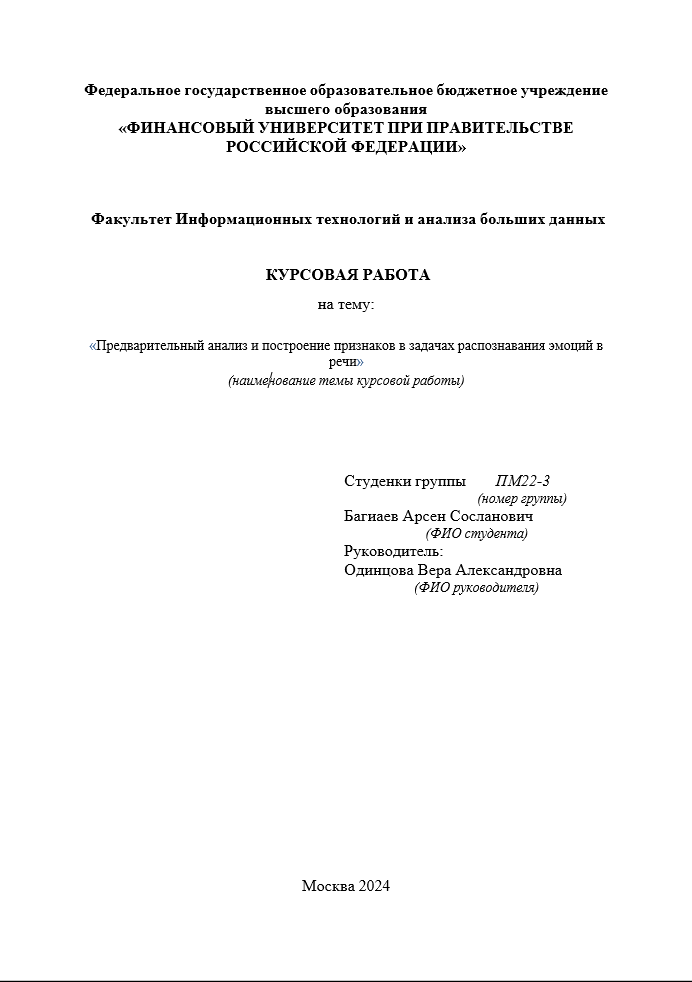

**Тема курсовой работы: Предварительный анализ и построение признаков в задачах распознавания эмоций в речи**

Цель данной курсовой работы: Провести анализ аудиофайлов с целью распознавания эмоций в речи и построения эффективных признаков для этой задачи. Задачи могут включать в себя  изучение различных методов извлечения признаков из аудиофайлов, таких как Мел-частотные кепстральные коэффициенты(MFCC), спектральные характеристики и временные параметры.    

Результат работы: подбор эффективных признаков, которые могут быть использованы для распознования эмоций с высокой точностью.




# Введение

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Современные технологии обработки и анализа аудиосигналов предоставляют широкие возможности для исследования и разработки систем распознавания эмоций в речи. Распознавание эмоций в речи играет ключевую роль в таких областях как развлечения, здравоохранение, робототехника, образование и многое другое. Например, автоматическое распознавание эмоций в речи может использоваться для создания персонализированных рекомендаций по музыке и фильмам, а также для развития систем поддержки психического здоровья.

Цель данной курсовой работы заключается в исследовании методов предварительного анализа и построения признаков в задачах распознавания эмоций в речи. В работе будет рассмотрено разнообразие признаков, используемых для анализа аудиосигналов, таких как мел-частотные кепстральные коэффициенты (MFCC), спектральные характеристики и временные параметры.

В ходе работы будет использован набор данных, содержащий аудиозаписи с различными эмоциональными состояниями говорящего, а также будет разработана и обучена модель машинного обучения для классификации эмоций в речи на основе извлеченных признаков. Полученные результаты могут быть использованы для создания более точных и надежных систем распознавания эмоций в речи, что имеет важное значение для ряда прикладных областей.

# Импорт библиотек

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

#  для воспроизведения аудио
from IPython.display import Audio
plt.style.use('seaborn-white')

<ipython-input-4-a9a22a402cad>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


# Загрузка и обработка данных

In [ ]:
DATA_FRAMES = True
fem_path = '/content/drive/MyDrive/data/dataa/Female_features.csv'
mal_path = '/content/drive/MyDrive/data/dataa/Male_features.csv'

Набор данных состоит из четырех рызных наборов аудиофайлов.    
Количество данных:    
1. CREMA-D - 7442
2. TESS - 2800
3. RAVDESS - 2076
4. SAVEE - 480

Определим пути к этим наборам данных:

In [ ]:
TESS = '/content/drive/MyDrive/data/dataa/TESS Toronto emotional speech set data'
RAV = "/content/drive/MyDrive/data/dataa/speech_actors/audio_speech_actors_01-24"
SAVEE = "/content/drive/MyDrive/data/dataa/ALL"
CREMA = "/content/drive/MyDrive/data/dataa/AudioWAV"

In [ ]:
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown')
    path.append(SAVEE + i)

SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                             path
0  angry  /content/drive/MyDrive/data/dataa/ALLDC_a03.wav
1  angry  /content/drive/MyDrive/data/dataa/ALLDC_a04.wav
2  angry  /content/drive/MyDrive/data/dataa/ALLDC_a06.wav
3  angry  /content/drive/MyDrive/data/dataa/ALLDC_a05.wav
4  angry  /content/drive/MyDrive/data/dataa/ALLDC_a01.wav

In [ ]:
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS +'/'+ i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0  angry  /content/drive/MyDrive/data/dataa/TESS Toronto...
1  angry  /content/drive/MyDrive/data/dataa/TESS Toronto...
2  angry  /content/drive/MyDrive/data/dataa/TESS Toronto...
3  angry  /content/drive/MyDrive/data/dataa/TESS Toronto...
4  angry  /content/drive/MyDrive/data/dataa/TESS Toronto...

In [ ]:
dir = os.listdir(RAV)

males = []
females = []

for actor in dir:

    files = os.listdir(RAV +'/'+ actor)

    for file in files:
        part = file.split('.')[0]
        part = part.split("-")

        temp = int(part[6])

        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'

        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path])
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])


RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
1  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
2     calm  /content/drive/MyDrive/data/dataa/speech_actor...
3  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
4  neutral  /content/drive/MyDrive/data/dataa/speech_actor...

In [ ]:
RavMales_df.head()

labels                                               path
0  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
1  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
2  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
3  neutral  /content/drive/MyDrive/data/dataa/speech_actor...
4    angry  /content/drive/MyDrive/data/dataa/speech_actor...

In [ ]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files:
    part = file.split('_')

    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'
    else:
        emotion = 'unknown'

    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path])
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])

CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']

print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                               path
0  disgust  /content/drive/MyDrive/data/dataa/AudioWAV/107...
1  neutral  /content/drive/MyDrive/data/dataa/AudioWAV/107...
2      sad  /content/drive/MyDrive/data/dataa/AudioWAV/107...
3    happy  /content/drive/MyDrive/data/dataa/AudioWAV/107...
4  disgust  /content/drive/MyDrive/data/dataa/AudioWAV/107...

In [ ]:
CremaMales_df.head()

labels                                               path
0  disgust  /content/drive/MyDrive/data/dataa/AudioWAV/108...
1     fear  /content/drive/MyDrive/data/dataa/AudioWAV/108...
2     fear  /content/drive/MyDrive/data/dataa/AudioWAV/108...
3      sad  /content/drive/MyDrive/data/dataa/AudioWAV/108...
4  disgust  /content/drive/MyDrive/data/dataa/AudioWAV/108...

Объеденим датасеты и сохраним в виде csv файла

In [ ]:
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# Визуализация данных


Сначала мы построим гистограмму, чтобы показать количество эмоций (в зависимости от пола). Затем с помощью библиотеки librosa покажем несколько волновых графиков для разных эмоций

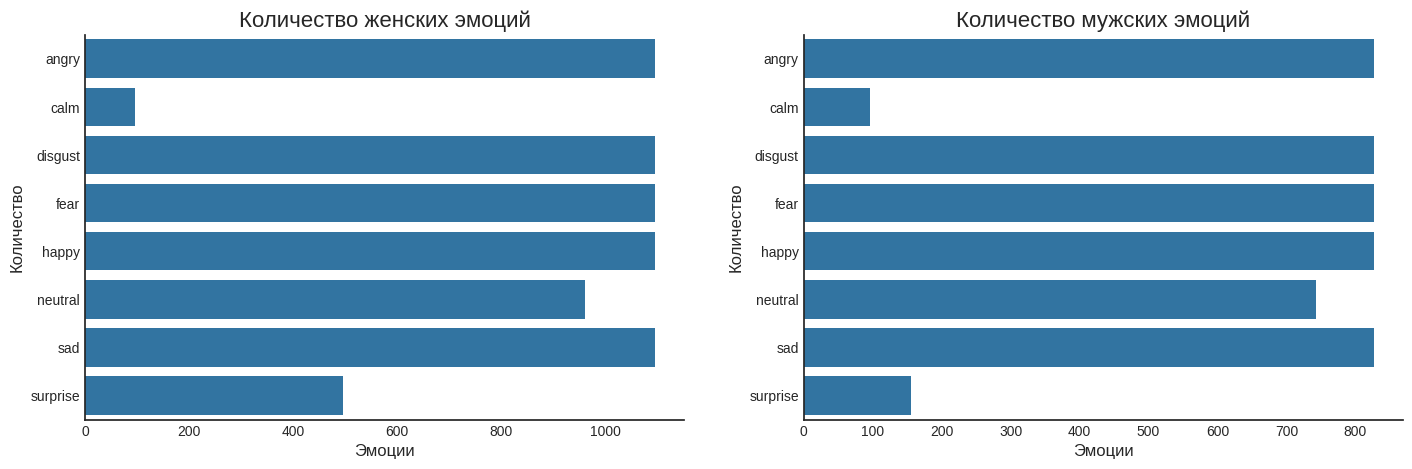

In [ ]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Количество женских эмоций', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Количество', size=12)
plt.xlabel('Эмоции', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Количество мужских эмоций', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Количество', size=12)
plt.xlabel('Эмоции', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

Судя по графикам, можно сделать вывод, что распределение для женских и мужских голосов выглядит схожим. Однако, можно заметить, что мужской пол меньше поддается удивлению, также мужской пол немного спокойнее.

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Волновая диаграмма для эмоции {e}', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

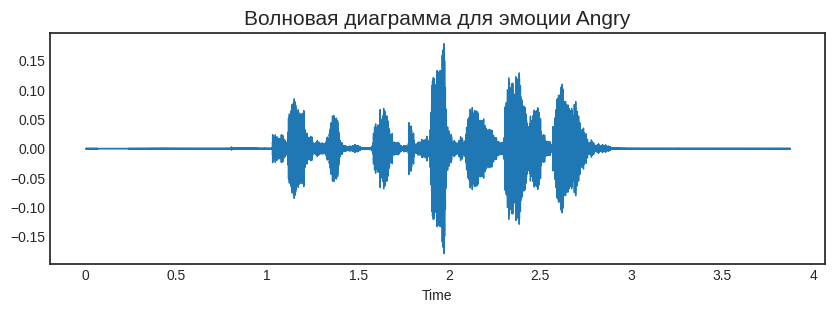

In [ ]:
emotion='Angry'
path = '/content/drive/MyDrive/data/dataa/speech_actors/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

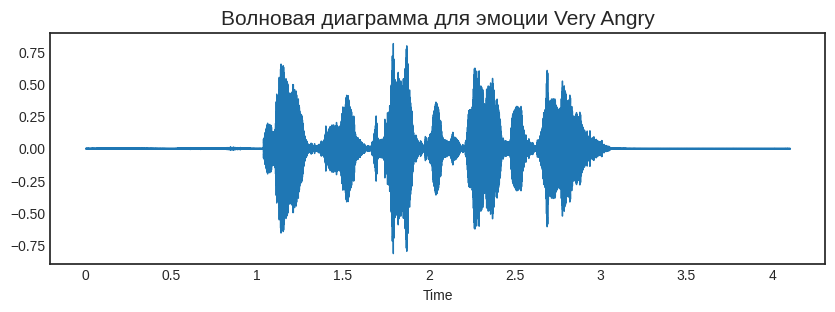

In [ ]:
emotion='Very Angry'
path = '/content/drive/MyDrive/data/dataa/speech_actors/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)


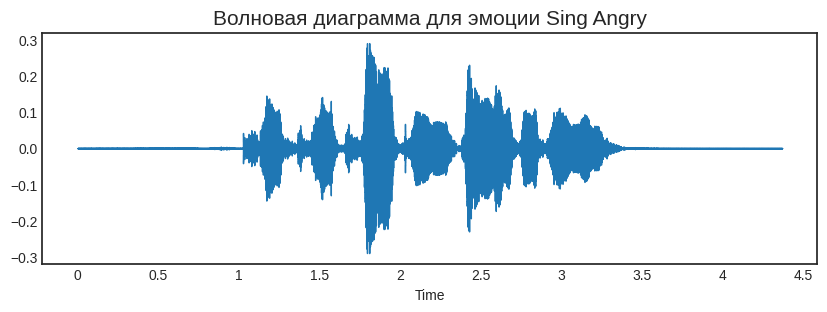

In [ ]:
emotion='Sing Angry'
path = '/content/drive/MyDrive/data/dataa/song_actors/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

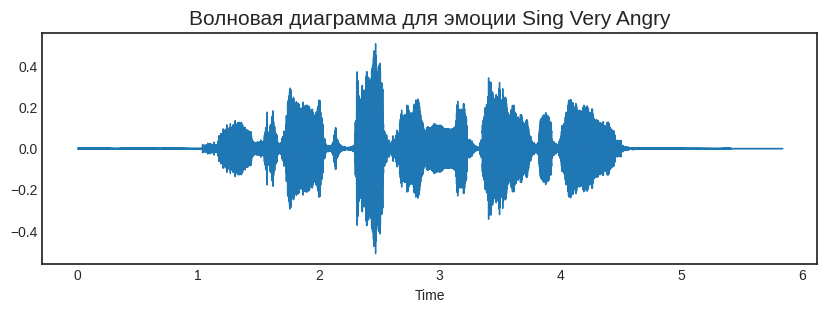

In [ ]:
emotion='Sing Very Angry'
path = '/content/drive/MyDrive/data/dataa/song_actors/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, ratee=0.70):
    return librosa.effects.time_stretch(data, rate=ratee)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, rate = speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, rate = speed_factor)

# ссылка для примера
path = path = '/content/drive/MyDrive/data/dataa/speech_actors/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

Вот что делает каждая функция:

1. noise(data): Добавляет случайный шум к аудиофайлу.
2. stretch(data, rate): Растягивает или сжимает аудиофайл во времени, изменяя его скорость воспроизведения.
3. shift(data): Сдвигает аудиофайл по времени на случайное количество сэмплов.
4. pitch(data, sampling_rate, pitch_factor): Изменяет тональность аудиофайла.
5. higher_speed(data, speed_factor): Увеличивает скорость воспроизведения аудиофайла.
6. lower_speed(data, speed_factor): Уменьшает скорость воспроизведения аудиофайла.

Покажем на примере:

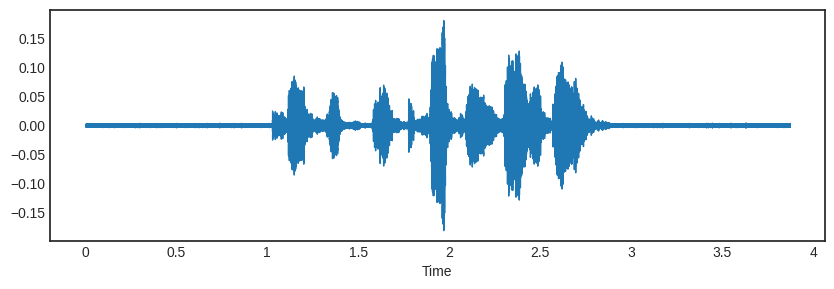

In [ ]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

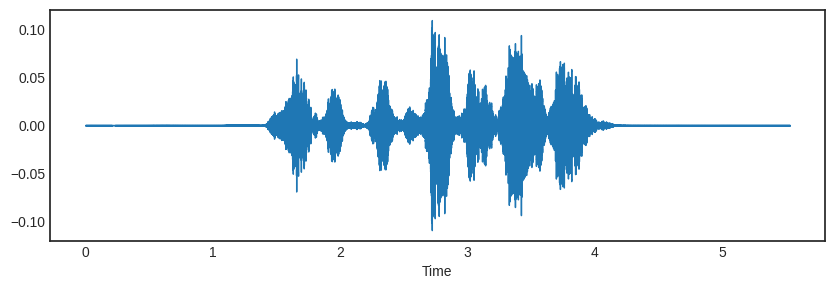

In [ ]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

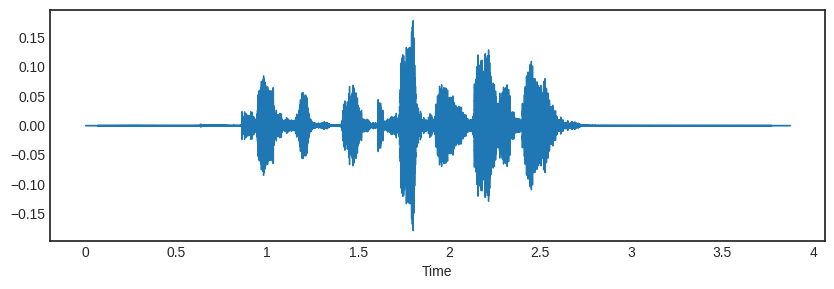

In [ ]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

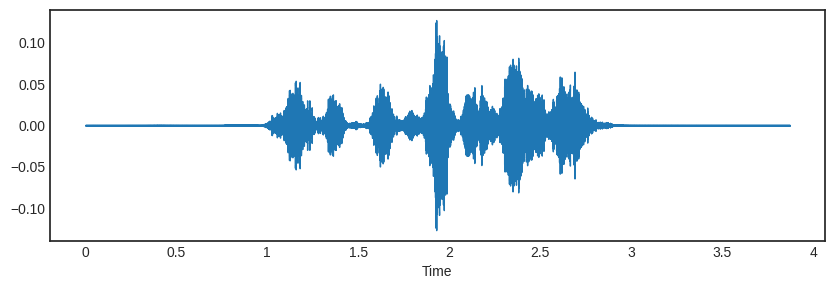

In [ ]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

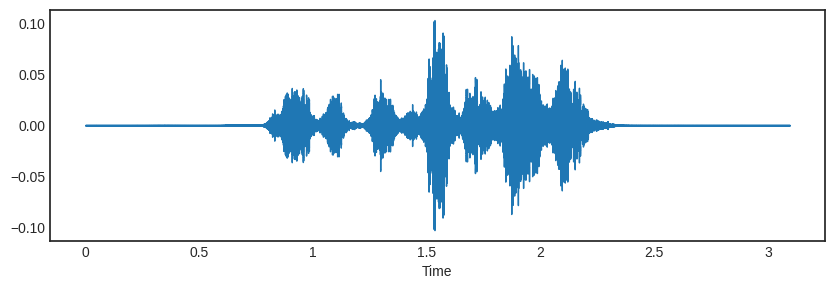

In [ ]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

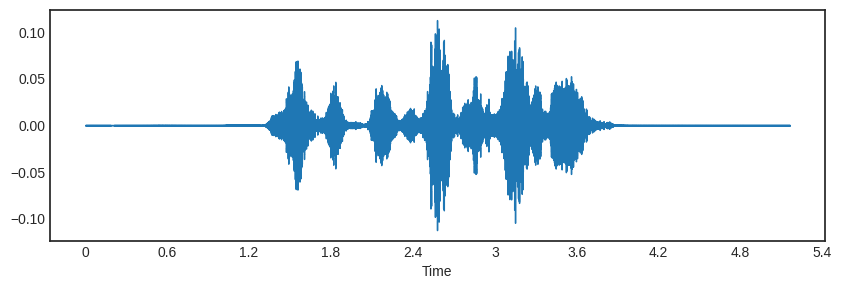

In [ ]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Извлечение признаков

Как мы понимаем, данные, предоставленные из аудио, не могут быть поняты моделями напрямую, поэтому нам необходимо преобразовать их в понятный формат. Аудиосигнал представляет собой трехмерный сигнал, в котором три оси представляют время, амплитуду и частоту.

Глядя на графики выше, кажется очевидным, что сама форма сигнала не обязательно может дать четкую информацию для идентификации класса. На самом деле они очень похожи.

Оказывается, одним из лучших инструментов для извлечения из аудиосигналов (и цифрового сигнала в целом) является Mel Frequency Cepstral Coefficents (MFCC).

**Мел-частотные кепстральные коэффициенты (MFCC)**    
Эта функция является одним из наиболее важных методов извлечения характеристики аудиосигнала и в основном используется при работе с аудиосигналами. Мел-частотные кепстральные коэффициенты (MFCC) сигнала представляют собой небольшой набор характеристик (обычно около 10–20), которые кратко описывают общую форму огибающей спектра.

In [ ]:
#sample_rate = 22050

def extract_features(data):

    result = np.array([])

    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))

    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))

    return result

In [ ]:
if not DATA_FRAMES:

    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features:
            female_X.append(elem)
            female_Y.append(emotion)


    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)

    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [ ]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)

    print(f'{gender} dataframe')
    df.sample(frac=1).head()

    return df

In [ ]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [ ]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

# Подготовка данных

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

In [ ]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [ ]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [ ]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

In [ ]:
# Масштабирование признаков с использованием StandartScaler

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [ ]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [ ]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

# Модель

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
import keras.utils
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [ ]:
with strategy.scope():

    def build_model(in_shape):

        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


        return model

In [ ]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()

    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]

    return model

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [ ]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

In [ ]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (Average  (None, 29, 256)           0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Avera  (None, 15, 128)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Avera  (None, 8, 128)            0

In [ ]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_3 (Avera  (None, 29, 256)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_4 (Avera  (None, 15, 128)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_5 (Avera  (None, 8, 128)           

In [ ]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_6 (Avera  (None, 29, 256)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_9 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_7 (Avera  (None, 15, 128)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_10 (Conv1D)          (None, 15, 128)           98432     
                                                                 
 average_pooling1d_8 (Avera  (None, 8, 128)           

# Обучение модели

In [ ]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 129s 61ms/step - loss: 1.1784 - accuracy: 0.5333 - val_loss: 1.0863 - val_accuracy: 0.5653 - lr: 0.0010
Epoch 2/75
2129/2129 [==============================] - 114s 54ms/step - loss: 1.1093 - accuracy: 0.5609 - val_loss: 1.0266 - val_accuracy: 0.5913 - lr: 0.0010
Epoch 3/75
2129/2129 [==============================] - 116s 54ms/step - loss: 1.0587 - accuracy: 0.5816 - val_loss: 0.9970 - val_accuracy: 0.5999 - lr: 0.0010
Epoch 4/75
2129/2129 [==============================] - 115s 54ms/step - loss: 1.0187 - accuracy: 0.5986 - val_loss: 0.9753 - val_accuracy: 0.6151 - lr: 0.0010
Epoch 5/75
2129/2129 [==============================] - 114s 53ms/step - loss: 0.9843 - accuracy: 0.6111 - val_loss: 0.9291 - val_accuracy: 0.6334 - lr: 0.0010
Epoch 6/75
2129/2129 [==============================] - 115s 54ms/step - loss: 0.9460 - accuracy: 0.6291 - val_loss: 0.8992 - val_accuracy: 0.6411 - lr: 0.0010
Epoch 7/75
2129/2129 [==================

In [ ]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

Epoch 1/75
1231/1231 [==============================] - 73s 56ms/step - loss: 1.2406 - accuracy: 0.5095 - val_loss: 0.9936 - val_accuracy: 0.5997 - lr: 0.0010
Epoch 2/75
1231/1231 [==============================] - 72s 59ms/step - loss: 0.9690 - accuracy: 0.6116 - val_loss: 0.8746 - val_accuracy: 0.6501 - lr: 0.0010
Epoch 3/75
1231/1231 [==============================] - 66s 53ms/step - loss: 0.8780 - accuracy: 0.6492 - val_loss: 0.8002 - val_accuracy: 0.6792 - lr: 0.0010
Epoch 4/75
1231/1231 [==============================] - 70s 57ms/step - loss: 0.8203 - accuracy: 0.6710 - val_loss: 0.7518 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 5/75
1231/1231 [==============================] - 67s 55ms/step - loss: 0.7736 - accuracy: 0.6925 - val_loss: 0.7218 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 6/75
1231/1231 [==============================] - 66s 54ms/step - loss: 0.7326 - accuracy: 0.7099 - val_loss: 0.6622 - val_accuracy: 0.7384 - lr: 0.0010
Epoch 7/75
1231/1231 [========================

In [ ]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

Epoch 1/75
898/898 [==============================] - 51s 56ms/step - loss: 1.6808 - accuracy: 0.3154 - val_loss: 1.4675 - val_accuracy: 0.4088 - lr: 0.0010
Epoch 2/75
898/898 [==============================] - 48s 54ms/step - loss: 1.5058 - accuracy: 0.3943 - val_loss: 1.3830 - val_accuracy: 0.4431 - lr: 0.0010
Epoch 3/75
898/898 [==============================] - 53s 59ms/step - loss: 1.4243 - accuracy: 0.4350 - val_loss: 1.2987 - val_accuracy: 0.4912 - lr: 0.0010
Epoch 4/75
898/898 [==============================] - 48s 53ms/step - loss: 1.3604 - accuracy: 0.4582 - val_loss: 1.2439 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 5/75
898/898 [==============================] - 48s 54ms/step - loss: 1.3011 - accuracy: 0.4856 - val_loss: 1.1943 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 6/75
898/898 [==============================] - 48s 53ms/step - loss: 1.2350 - accuracy: 0.5119 - val_loss: 1.1357 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 7/75
898/898 [==============================] - 48s 

# Оценка производительности

Accuracy для общей модели

In [ ]:
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {0:.2%}".format(score[1]))

Accuracy для модели с данными женского пола

In [ ]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Accuracy: {0:.2%}".format(score[1]))

Accuracy: 99.51%
Accuracy: 93.71%


Accuracy для модели с данными мужского пола

In [ ]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print(" Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print(" Accuracy: {0:.2%}".format(score[1]))

 Accuracy: 98.71%
 Accuracy: 87.54%


# Тенденции в процессе обучения и валидации модели

In [ ]:
show_graphs(history)

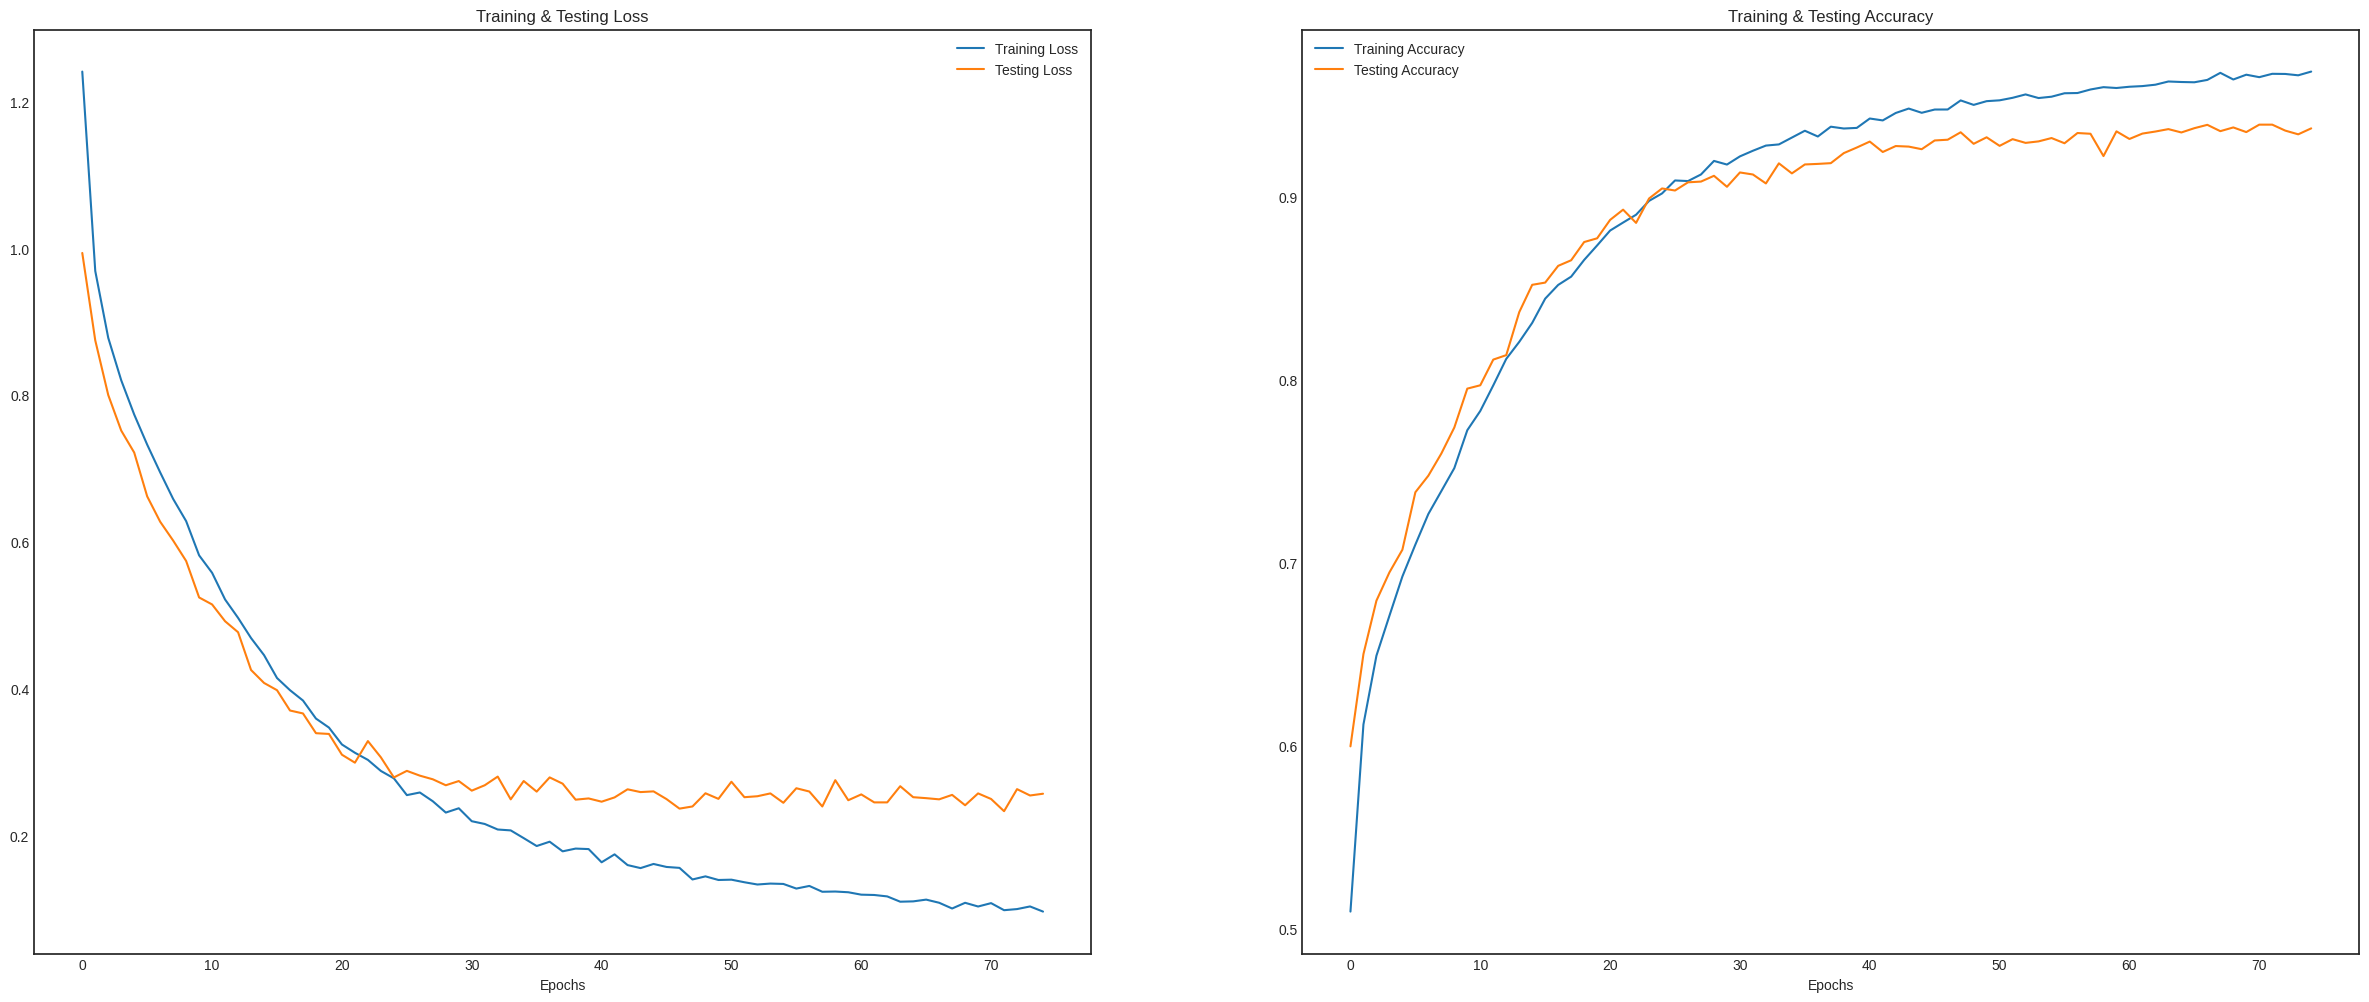

In [ ]:
show_graphs(female_history)

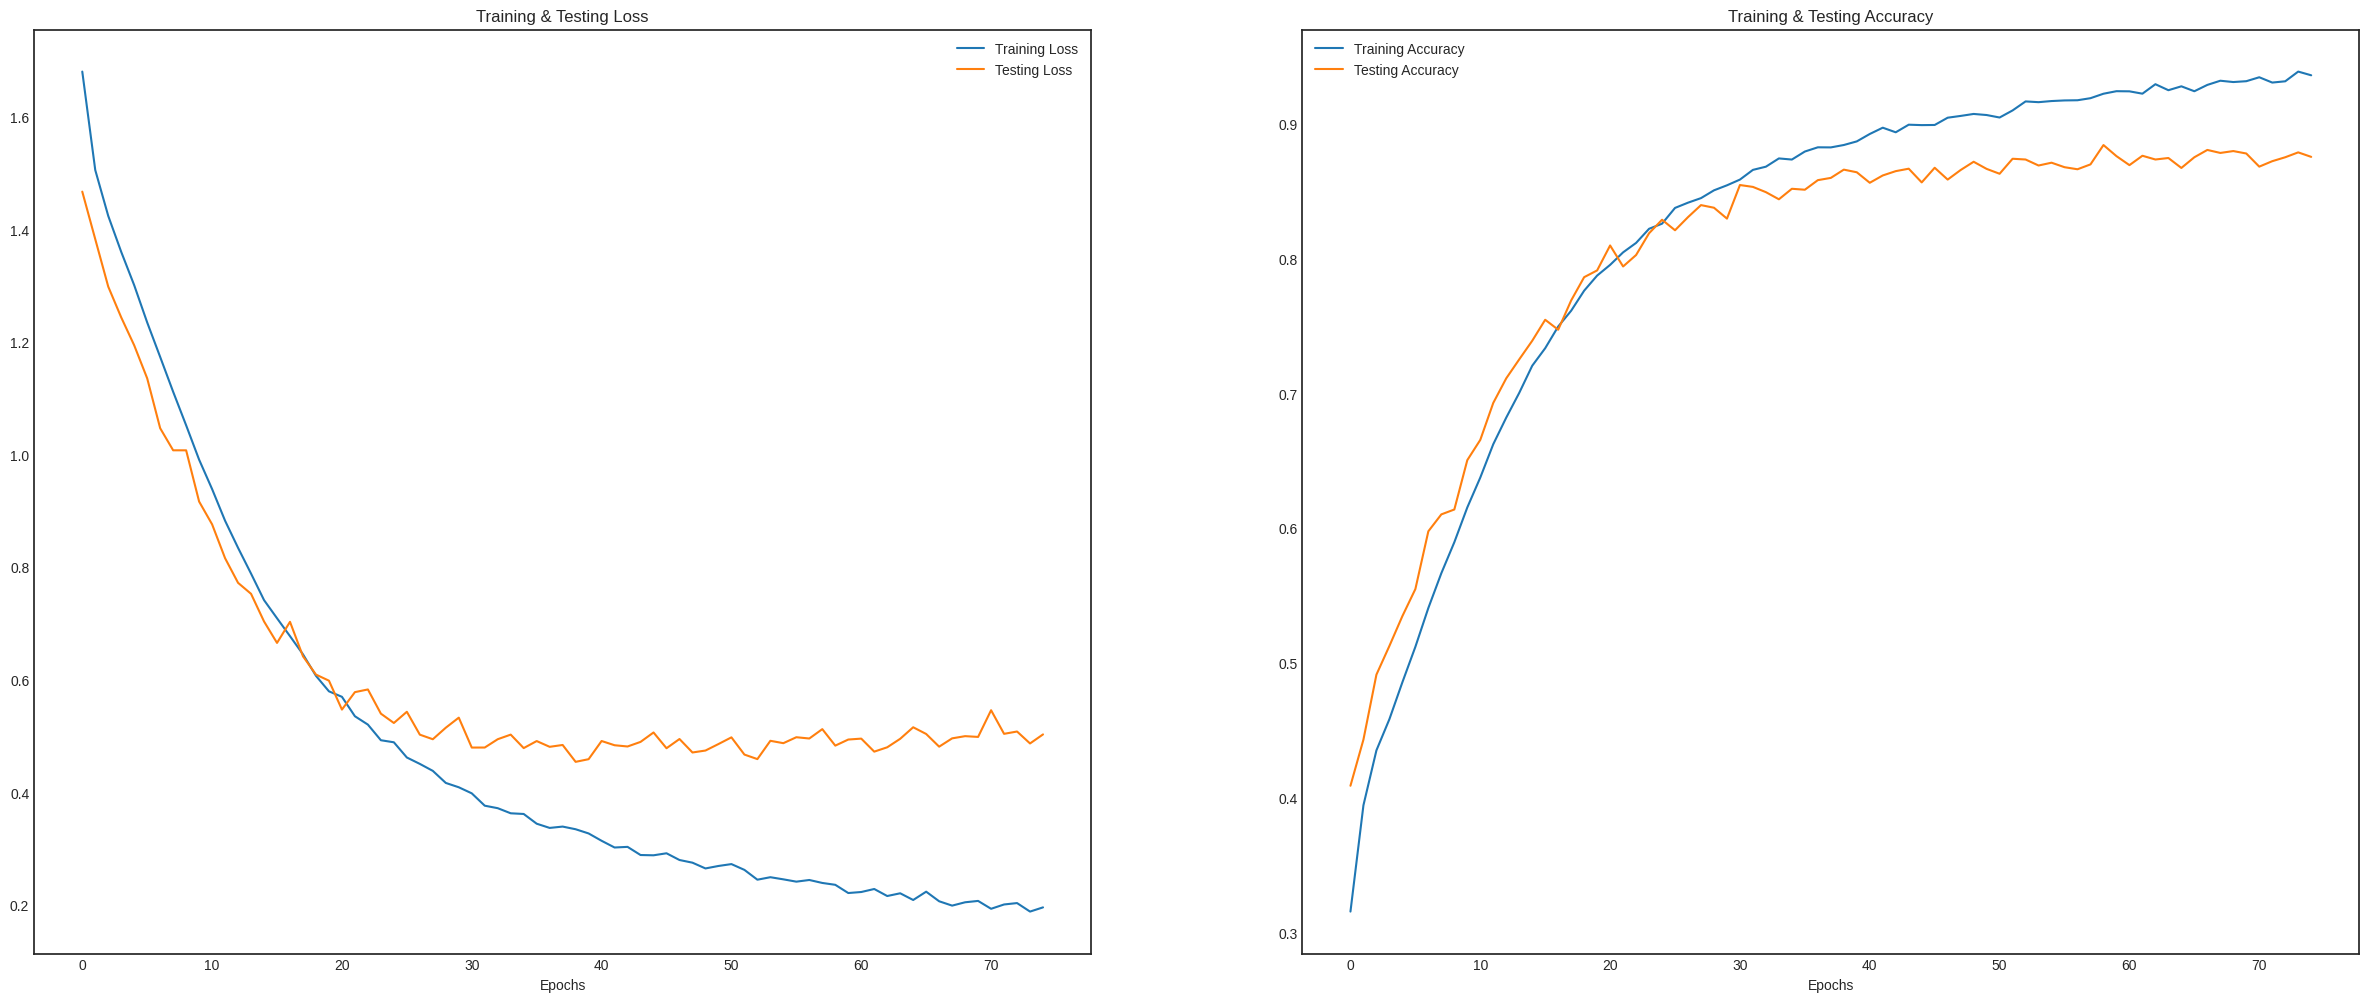

In [ ]:
show_graphs(male_history)

# Матрица несоответствий

In [ ]:
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

308/308 [==============================] - 5s 17ms/step


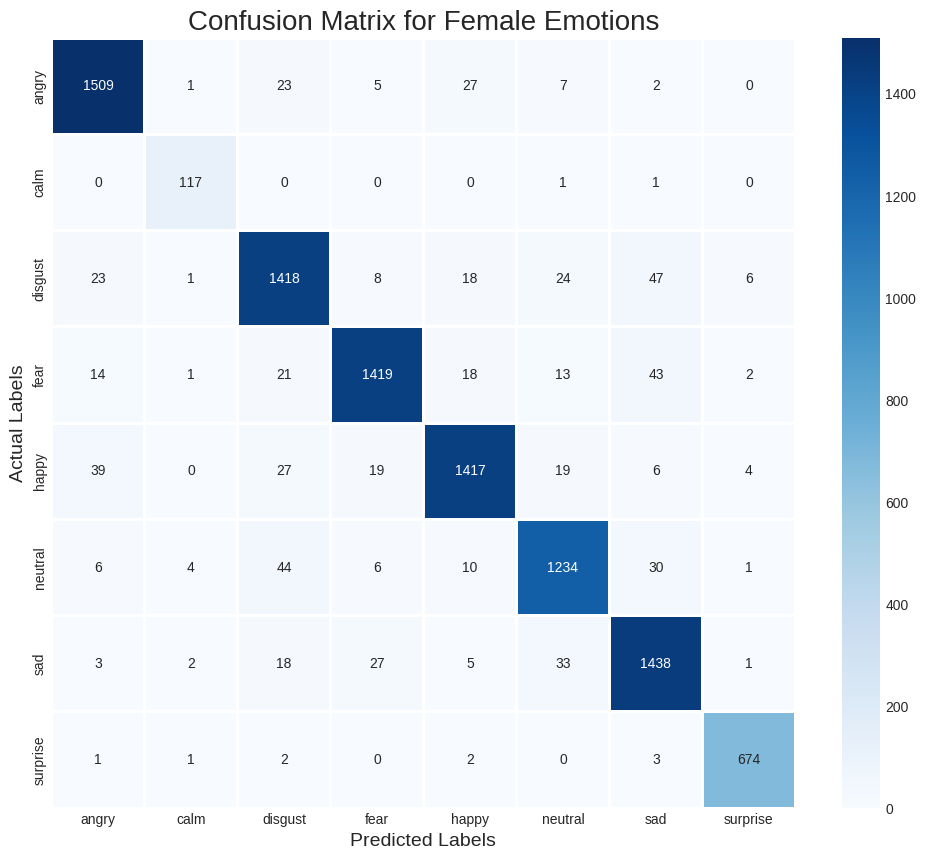

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

225/225 [==============================] - 3s 12ms/step


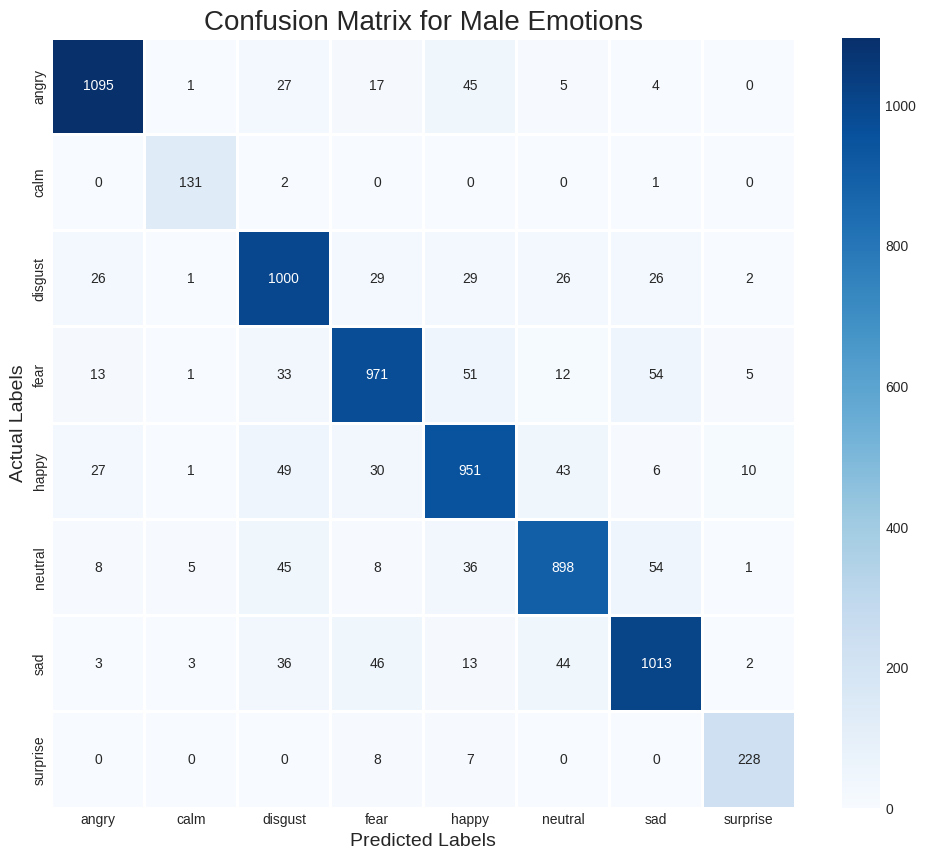

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


# Заключение

Ссылка на colab: https://colab.research.google.com/drive/1sMRJXtVK5yeBfPtsvu0ZBzsRKqVxZOAa?usp=sharing    

    
В ходе нашей работы мы исследовали задачу распознавания эмоций в речи с использованием предварительного анализа и построения признаков. Мы успешно обучили общую модель на аудиоданных, достигнув значительной точности и низкого значения функции потерь.

Анализируя результаты обучения моделей для разных гендеров, мы отмечаем, что модель для женского пола продемонстрировала высокую точность и низкое значение функции потерь как на обучающем, так и на валидационном наборах данных. Модель для мужского пола также показала хорошие результаты, хотя наблюдался небольшой разрыв между точностью на обучающем и валидационном наборах данных.

Дополнительно, мы рассмотрели матрицы ошибок для эмоций как для женского, так и для мужского гендеров. Матрицы ошибок позволили нам оценить, какие эмоции были лучше распознаны моделью, а также выявить те, которые могут потребовать дополнительной настройки или улучшения.

В целом, наши результаты подтверждают эффективность подхода к распознаванию эмоций в речи с использованием анализа аудиоданных. Дальнейшие исследования могут включать в себя более глубокий анализ конкретных эмоций, улучшение моделей для определенных гендеров и расширение датасета для улучшения общей производительности моделей.